In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "/content/drive/MyDrive/Final_project/data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

matplotlib.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
reset_seeds(SEED)

In [5]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어.csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112773,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112774,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112775,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112776,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


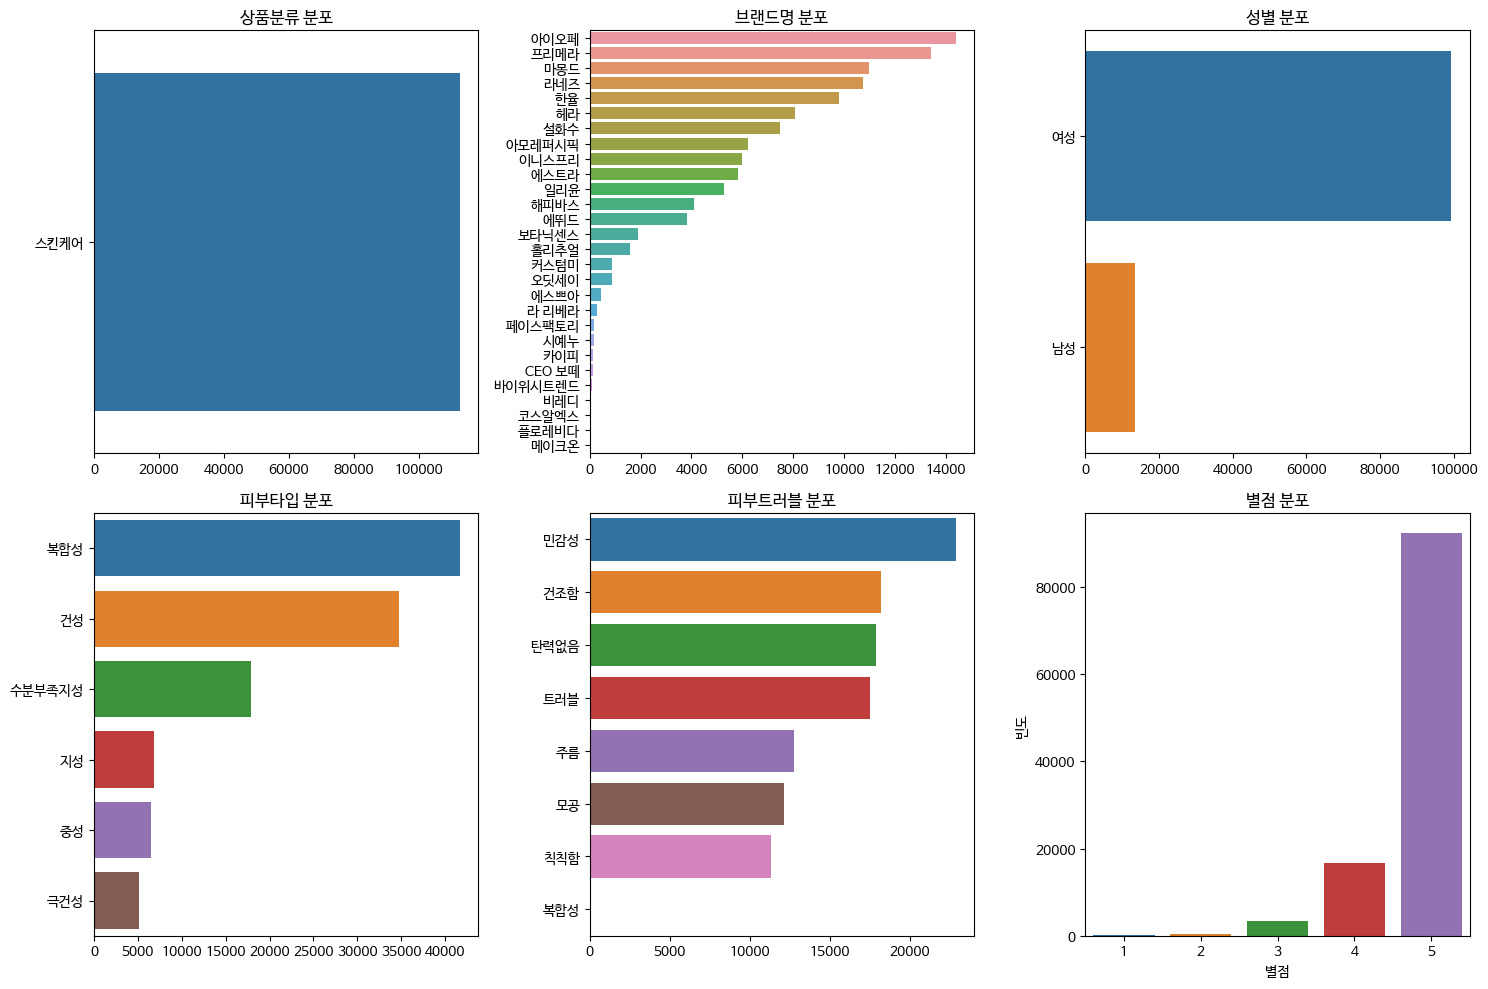

In [6]:
# 설정
plt.figure(figsize=(15, 10))

# 범주형 특성의 분포
categorical_features = ['상품분류', '브랜드명', '성별', '피부타입', '피부트러블']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature} 분포')
    plt.xlabel('')
    plt.ylabel('')

# 별점 분포
plt.subplot(2, 3, 6)
sns.countplot(x='별점', data=df)
plt.title('별점 분포')
plt.xlabel('별점')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()


In [7]:
df['피부트러블'].value_counts()

민감성     22888
건조함     18234
탄력없음    17890
트러블     17505
주름      12792
모공      12154
칙칙함     11314
복합성         1
Name: 피부트러블, dtype: int64

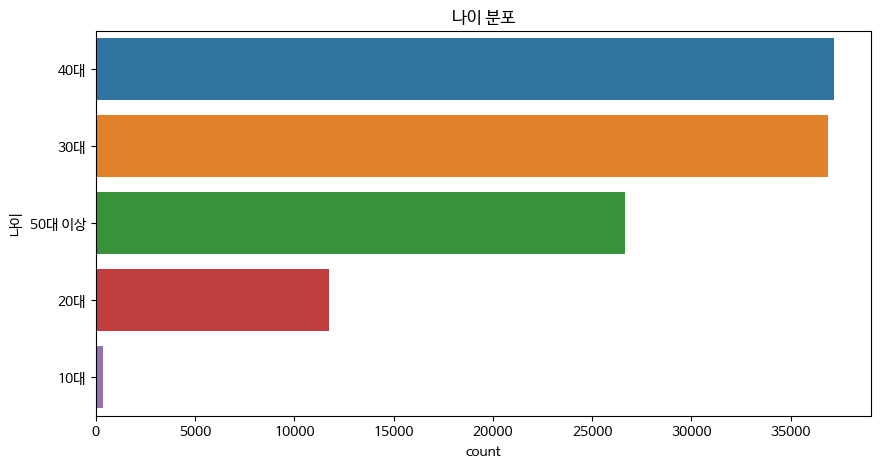

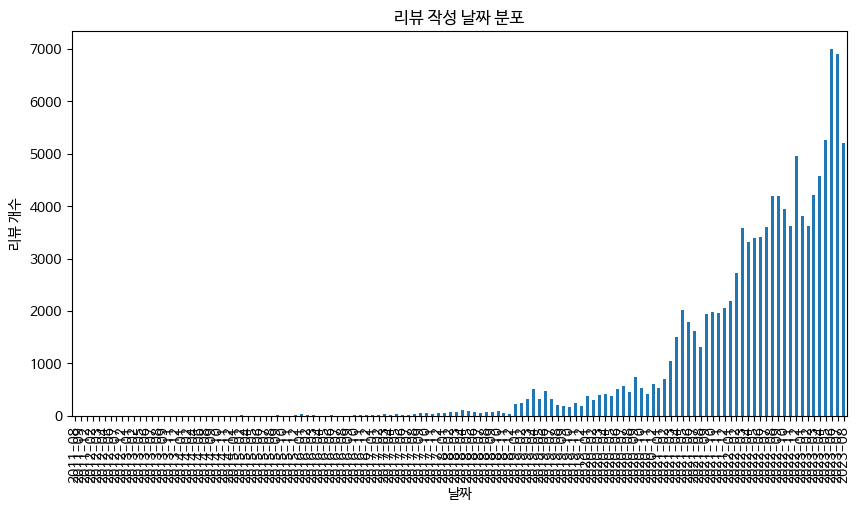

In [8]:
# 나이 분포
plt.figure(figsize=(10, 5))
sns.countplot(y='나이', data=df, order=df['나이'].value_counts().index)
plt.title('나이 분포')
plt.show()

# 리뷰 작성 날짜 분포
df['리뷰작성날짜'] = pd.to_datetime(df['리뷰작성날짜'])
date_distribution = df['리뷰작성날짜'].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(10, 5))
date_distribution.plot(kind='bar')
plt.title('리뷰 작성 날짜 분포')
plt.xlabel('날짜')
plt.ylabel('리뷰 개수')
plt.show()

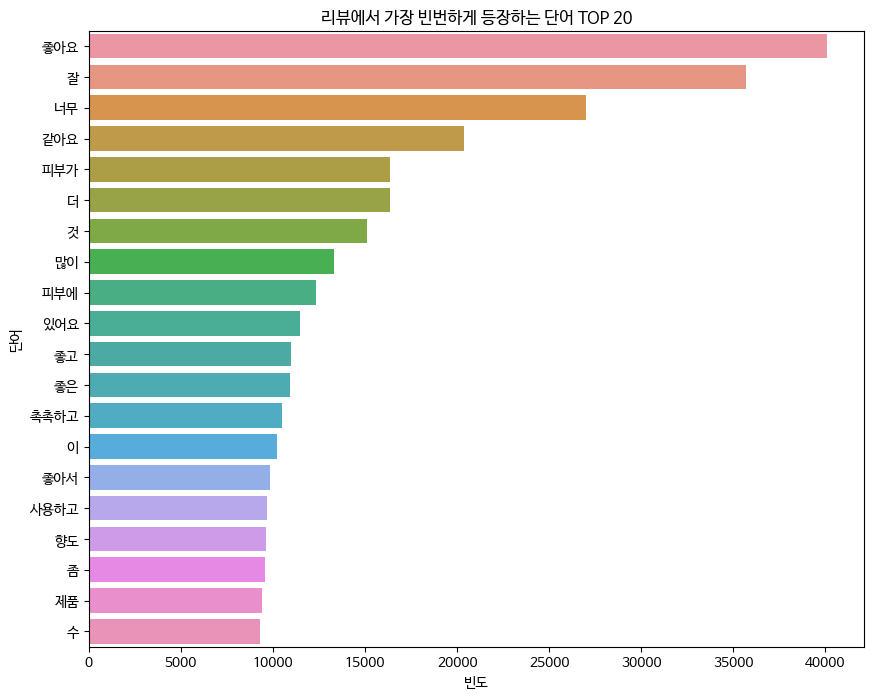

In [9]:
from collections import Counter
import re

# 리뷰 텍스트에서 한글만 추출
reviews = ' '.join(df['리뷰'])
# korean_words = re.findall(r'[\uac00-\ud7a3]+', reviews)
korean_words = re.findall(r'[가-힣]+', reviews)

# 가장 빈번하게 등장하는 단어 확인
word_counts = Counter(korean_words)
common_words = word_counts.most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['단어', '빈도'])

plt.figure(figsize=(10, 8))
sns.barplot(x='빈도', y='단어', data=common_words_df)
plt.title('리뷰에서 가장 빈번하게 등장하는 단어 TOP 20')
plt.show()


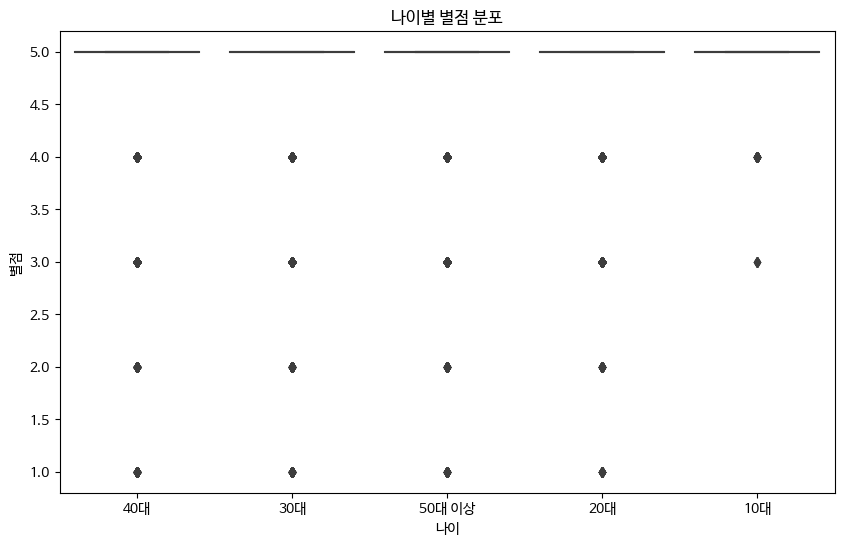

In [10]:
# 나이와 별점 간의 관계 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x='나이', y='별점', data=df, order=df['나이'].value_counts().index)
plt.title('나이별 별점 분포')
plt.show()


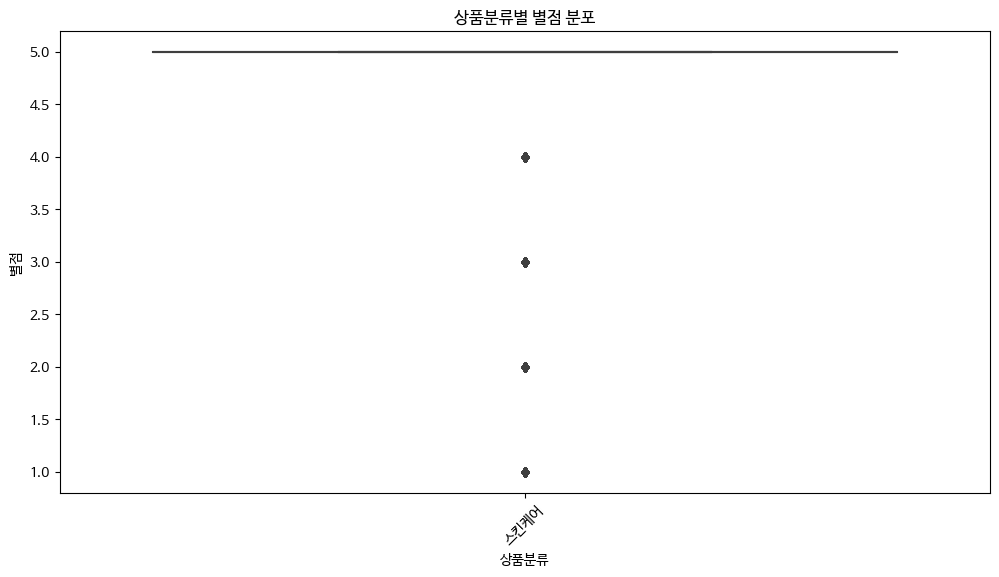

In [11]:
# 상품분류별 별점 분포 확인
plt.figure(figsize=(12, 6))
sns.boxplot(x='상품분류', y='별점', data=df, order=df['상품분류'].value_counts().index)
plt.title('상품분류별 별점 분포')
plt.xticks(rotation=45)
plt.show()


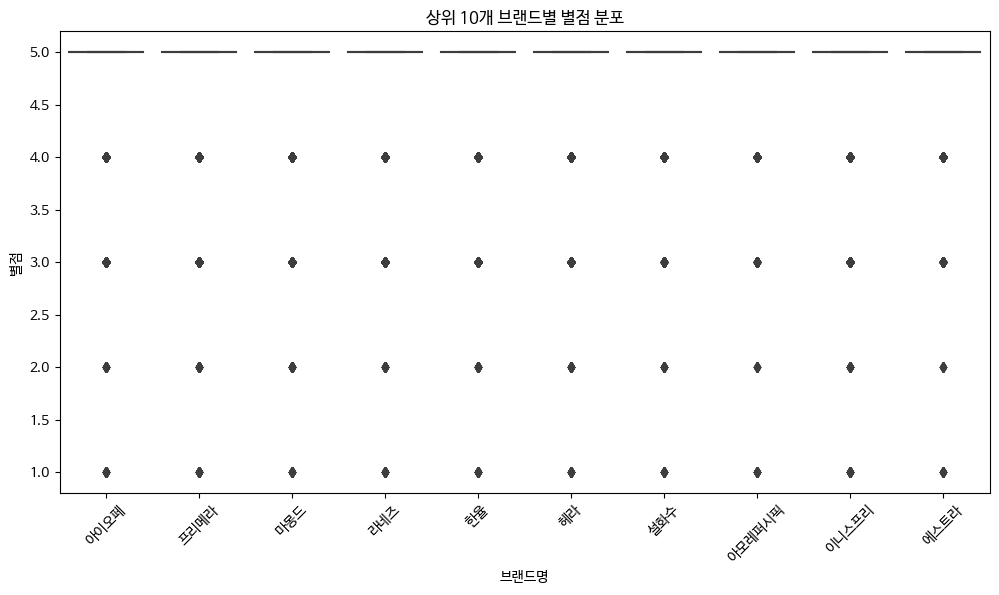

In [12]:
# 리뷰 수가 많은 상위 10개 브랜드 선택
top_brands = df['브랜드명'].value_counts().head(10).index

# 상위 10개 브랜드만 포함된 데이터프레임 생성
top_brands_df = df[df['브랜드명'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='브랜드명', y='별점', data=top_brands_df, order=top_brands)
plt.title('상위 10개 브랜드별 별점 분포')
plt.xticks(rotation=45)
plt.show()


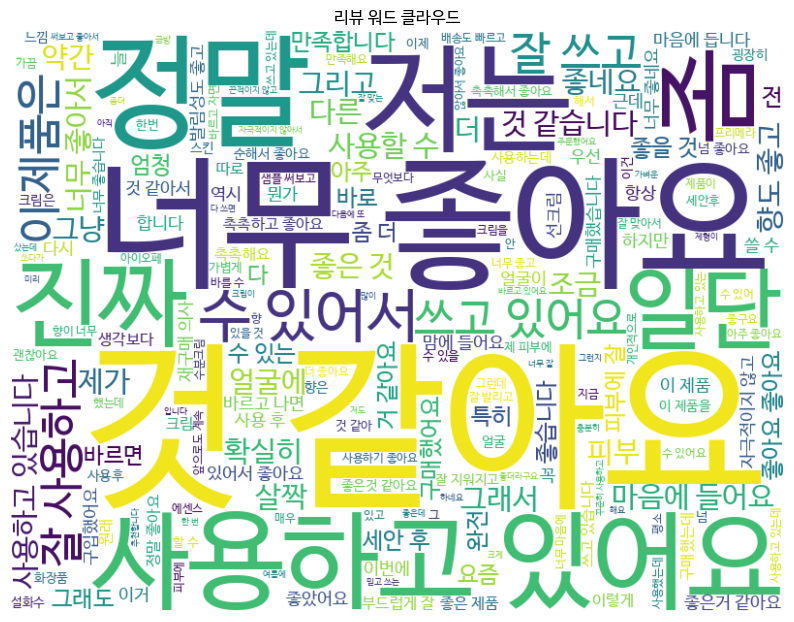

In [13]:
from wordcloud import WordCloud

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      background_color='white',
                      width=800,
                      height=600).generate(' '.join(korean_words))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('리뷰 워드 클라우드')
plt.show()


In [14]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 51.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9dd1028c9e07533cfa69d5a534e4bdc51e35119c9399dacb6477178a666f6d7c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [16]:
import pandas_profiling

<ipython-input-16-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [21]:
profile = df.profile_report(title='Pandas Profiling Report', minimal=True)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 53416 (\N{HANGUL SYLLABLE KIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/pandas_profiling/visualisation/utils.py:73: UserWarning: Glyph 51060 (\N{HANG

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111870 entries, 0 to 111869
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   상품분류    111870 non-null  object        
 1   브랜드명    111870 non-null  object        
 2   상품명     111870 non-null  object        
 3   사용자 이름  111870 non-null  object        
 4   별점      111870 non-null  int64         
 5   리뷰작성날짜  111870 non-null  datetime64[ns]
 6   나이      111870 non-null  object        
 7   성별      111870 non-null  object        
 8   피부타입    111870 non-null  object        
 9   피부트러블   111870 non-null  object        
 10  리뷰      111870 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 9.4+ MB
